In [1]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.0 MB/s eta 0:00:00


In [2]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.4 MB/s eta 0:00:00


In [3]:
pip install fuzzywuzzy

In [4]:
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
inter_color = '#0055A4'

# Caricamento del dataset e prima analisi, con un filtering

In [7]:
file_path = '/content/gdrive/MyDrive/FC Internazionale Data Science Challenge/Stats22-23.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,2685,Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
2685,2686,Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
2686,2687,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,0.38,0.00,0.13,0.0,0.0,0.00,2.05,14.50,3.59,80.1


In [8]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=124)

In [9]:
# Controllo che i campionati siano effettivamente i 5 di riferimento
campionati = df['Comp'].unique()
print(campionati)

['Premier League' 'Ligue 1' 'Serie A' 'La Liga' 'Bundesliga']


In [10]:
# Valuto anche quali sono le posizioni per capire quali posso escludere a priori
posizioni = df['Pos'].unique()
print(posizioni)

['MFFW' 'DF' 'MF' 'FWMF' 'FW' 'DFFW' 'MFDF' 'GK' 'DFMF' 'FWDF']


In [11]:
# Vedo qual è la posizione di Francesco Acerbi
acerbi = df[df['Player'] == 'Francesco Acerbi']
posizione_acerbi = acerbi['Pos'].values[0] if not acerbi.empty else None

print(f"La posizione di Francesco Acerbi è: {posizione_acerbi}")

La posizione di Francesco Acerbi è: DF


Ok, Acerbi è DF come mi immaginavo, però mentre posizioni come GK (goalkeeper) e MF (midfielder) hanno significato chiaro, altre no. Per sicurezza quindi controllo i giocatori corrispondenti alle posizioni che hanno la D nella sigla, essendo che D potrebbe stare per defender

In [12]:
df_filtered_dffw = df[df['Pos'] == 'DFFW']
print(df_filtered_dffw)
# Ad occhio sono esterni di centrocampo, ma comunque sicuramente non centrali di difesa

        Rk              Player Nation   Pos           Squad            Comp  \
26      27           Felix Agu    GER  DFFW   Werder Bremen      Bundesliga   
69      70       Jim Allevinah    GAB  DFFW   Clermont Foot         Ligue 1   
331    332     Ismaëlben Boura    FRA  DFFW            Lens         Ligue 1   
359    360       Andreas Bruus    DEN  DFFW          Troyes         Ligue 1   
363    364        Lee Buchanan    ENG  DFFW   Werder Bremen      Bundesliga   
419    420        João Cancelo    POR  DFFW   Bayern Munich      Bundesliga   
491    492     Federico Chiesa    ITA  DFFW        Juventus         Serie A   
506    507           Tio Cipot    SVN  DFFW          Spezia         Serie A   
517    518         Marcus Coco    FRA  DFFW          Nantes         Ligue 1   
558    559    Tanguy Coulibaly    FRA  DFFW       Stuttgart      Bundesliga   
570    571       Juan Cuadrado    COL  DFFW        Juventus         Serie A   
578    579  Marco D'Alessandro    ITA  DFFW         

In [13]:
df_filtered_dfmf = df[df['Pos'] == 'DFMF']
print(df_filtered_dfmf)
# Questi anche sembrano terzini o esterni

        Rk             Player Nation   Pos           Squad        Comp  Age  \
67      68      Faride Alidou    GER  DFMF  Eint Frankfurt  Bundesliga   21   
81      82     Ibrahim Amadou    FRA  DFMF          Angers     Ligue 1   29   
89      90       Ethan Ampadu    WAL  DFMF          Spezia     Serie A   22   
110    111      Dennis Appiah    FRA  DFMF          Nantes     Ligue 1   30   
136    137        Youcef Atal    ALG  DFMF            Nice     Ligue 1   26   
...    ...                ...    ...   ...             ...         ...  ...   
2655  2656  Alessandro Zanoli    ITA  DFMF       Sampdoria     Serie A   22   
2658  2659  Davide Zappacosta    ITA  DFMF        Atalanta     Serie A   30   
2661  2662       Akim Zedadka    ALG  DFMF           Lille     Ligue 1   27   
2662  2663      Mehdi Zeffane    ALG  DFMF   Clermont Foot     Ligue 1   30   
2678  2679       Nadir Zortea    ITA  DFMF        Atalanta     Serie A   23   

      Born  MP  Starts  ...   Off    Crs  TklW  PKw

In [14]:
df_filtered_fwdf = df[df['Pos'] == 'FWDF']
print(df_filtered_fwdf)
# Questi sembrano addirittura esterni d'attacco, quindi elimino anche loro

        Rk                 Player Nation   Pos            Squad  \
204    205      Ander Barrenetxea    ESP  FWDF    Real Sociedad   
224    225            Ihlas Bebou    TOG  FWDF       Hoffenheim   
266    267    Mitchell van Bergen    NED  FWDF            Reims   
422    423            Sergi Canós    ESP  FWDF        Brentford   
486    487          Pep Chavarría    ESP  FWDF   Rayo Vallecano   
746    747            Shane Duffy    IRL  FWDF           Fulham   
864    865             Phil Foden    ENG  FWDF  Manchester City   
1024  1025    Gabriel Gudmundsson    SWE  FWDF            Lille   
1054  1055         Emmanuel Gyasi    GHA  FWDF           Spezia   
1084  1085         Thorgan Hazard    BEL  FWDF         Dortmund   
1270  1271      Thomas Kastanaras    GRE  FWDF        Stuttgart   
1272  1273          Silas Katompa    COD  FWDF        Stuttgart   
1307  1308          Luca Koleosho    CAN  FWDF         Espanyol   
1352  1353  Giorgos Kyriakopoulos    GRE  FWDF         Sassuol

Ok, posso quindi filtrare il dataset solo per giocatori con posizione DF

In [15]:
df_filtered = df[df['Pos'] == 'DF']
df_filtered

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.00,0.0,6.64,2.18,1.23,64.0
8,9,Abner,BRA,DF,Betis,La Liga,22,2000,4,3,...,0.00,1.33,2.33,0.0,0.00,0.0,6.00,1.00,2.00,33.3
11,12,Francesco Acerbi,ITA,DF,Inter,Serie A,35,1988,14,12,...,0.08,0.24,0.57,0.0,0.00,0.0,4.96,2.76,1.63,63.0
13,14,Marcos Acuña,ARG,DF,Sevilla,La Liga,31,1991,16,12,...,0.09,7.61,1.74,0.0,0.09,0.0,7.52,1.19,0.92,56.5
17,18,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,25,1997,14,12,...,0.00,0.08,0.41,0.0,0.00,0.0,4.67,2.13,0.41,83.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,2673,David Zima,CZE,DF,Torino,Serie A,22,2000,9,4,...,0.00,0.00,1.11,0.0,0.00,0.0,5.33,3.33,2.00,62.5
2673,2674,Oleksandr Zinchenko,UKR,DF,Arsenal,Premier League,26,1996,14,13,...,0.00,1.83,0.75,0.0,0.00,0.0,7.00,1.75,0.58,75.0
2679,2680,Nadir Zortea,ITA,DF,Sassuolo,Serie A,23,1999,1,1,...,0.00,4.00,2.00,0.0,0.00,0.0,7.00,1.00,2.00,33.3
2680,2681,Kurt Zouma,FRA,DF,West Ham,Premier League,28,1994,15,15,...,0.00,0.00,0.14,0.0,0.00,0.0,3.94,2.61,0.35,88.1


Controllo ora i duplicati, ovvero i giocatori che si ripetono in più di una riga. Può succedere, ad esempio se uno si è trasferito durante il mercato invernale. Vediamo

In [16]:
duplicate_players = df_filtered[df_filtered.duplicated(subset='Player', keep=False)]
duplicate_players

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
86,87,Bruno Amione,ARG,DF,Hellas Verona,Serie A,21,2002,1,1,...,0.00,0.00,1.67,0.00,0.00,0.00,8.33,1.67,0.00,100.0
87,88,Bruno Amione,ARG,DF,Sampdoria,Serie A,21,2002,10,10,...,0.00,0.34,1.59,0.00,0.11,0.00,5.34,3.30,1.82,64.4
141,142,Ludwig Augustinsson,SWE,DF,Aston Villa,Premier League,28,1994,3,1,...,0.00,5.56,1.11,0.00,0.00,0.00,10.00,4.44,1.11,80.0
142,143,Ludwig Augustinsson,SWE,DF,Mallorca,La Liga,28,1994,1,1,...,0.00,3.75,0.00,0.00,0.00,0.00,3.75,2.50,0.00,100.0
159,160,Loïc Bade,FRA,DF,Sevilla,La Liga,22,2000,6,5,...,0.00,0.40,1.20,0.00,0.00,0.00,7.60,1.60,2.00,44.4
160,161,Loïc Bade,FRA,DF,Rennes,Ligue 1,22,2000,1,1,...,0.00,0.00,1.00,0.00,0.00,0.00,4.00,2.00,2.00,50.0
162,163,Benoît Badiashile,FRA,DF,Chelsea,Premier League,21,2001,4,4,...,0.00,0.00,0.50,0.00,0.00,0.00,5.50,4.00,1.00,80.0
163,164,Benoît Badiashile,FRA,DF,Monaco,Ligue 1,21,2001,11,9,...,0.00,0.00,0.86,0.00,0.00,0.00,7.20,2.26,0.75,75.0
229,230,Jan Bednarek,POL,DF,Southampton,Premier League,26,1996,4,4,...,0.00,0.26,1.32,0.00,0.00,0.26,6.32,2.89,1.58,64.7
230,231,Jan Bednarek,POL,DF,Aston Villa,Premier League,26,1996,3,1,...,0.00,0.00,2.73,0.00,0.00,0.00,3.64,0.00,0.00,0.0


Per i duplicati, sommo tutte le statistiche. Dato che cambiano squadra, per i campi che riguardano appunto squadra e campionato, per scegliere il valore che corrisponde sempre alla prima o all'ultima squadra della stagione dovrei valutare a mano ogni volta, quindi 29 volte, perché non ho nessuna indicazione sull'ordine cronologico. A questo punto per ogni giocatore tengo i dati della squadra in cui ha fatto più minuti giocati, tanto poi quando integrerò con l'altro dataset avrò comunque la squadra corrente, qua è interessante vedere qual è la squadra dove ha più sviluppato le statistiche

In [17]:
result_df = pd.DataFrame()

for player, group in duplicate_players.groupby('Player'):
    # Trovo l'indice della riga con il massimo valore nella colonna 'minutes'
    max_minutes_index = group['Min'].idxmax()

    # Seleziono la riga con il massimo valore di 'minutes'
    max_minutes_row = df_filtered.loc[max_minutes_index]

    # Sommo le colonne numeriche
    sum_numeric_cols = group.select_dtypes(include='number').sum()

    # Mantengo i valori delle colonne non numeriche dalla riga con il massimo valore di 'minutes'
    non_numeric_cols = max_minutes_row.drop(df_filtered.select_dtypes(include='number').columns)

    # Combino i risultati e aggiungo la riga al dataframe finale
    result_row = pd.concat([non_numeric_cols, sum_numeric_cols])
    result_df = result_df.append(result_row, ignore_index=True)

# Aggiorno le righe uniche nel dataframe originale
df_filtered = df_filtered.drop_duplicates(subset='Player', keep=False)
df_filtered = pd.concat([df_filtered, result_df], ignore_index=True)

df_filtered

<ipython-input-17-b418cd783aa3>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_row, ignore_index=True)
<ipython-input-17-b418cd783aa3>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_row, ignore_index=True)
<ipython-input-17-b418cd783aa3>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_row, ignore_index=True)
<ipython-input-17-b418cd783aa3>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_row, ignore_index=True)
<ipython-input-17-b418cd783aa3>:20: FutureWarning: The frame.append method i

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,2.0,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35.0,1987.0,22.0,22.0,...,0.05,0.18,1.59,0.0,0.00,0.00,6.64,2.18,1.23,64.0
1,9.0,Abner,BRA,DF,Betis,La Liga,22.0,2000.0,4.0,3.0,...,0.00,1.33,2.33,0.0,0.00,0.00,6.00,1.00,2.00,33.3
2,12.0,Francesco Acerbi,ITA,DF,Inter,Serie A,35.0,1988.0,14.0,12.0,...,0.08,0.24,0.57,0.0,0.00,0.00,4.96,2.76,1.63,63.0
3,14.0,Marcos Acuña,ARG,DF,Sevilla,La Liga,31.0,1991.0,16.0,12.0,...,0.09,7.61,1.74,0.0,0.09,0.00,7.52,1.19,0.92,56.5
4,18.0,Tosin Adarabioyo,ENG,DF,Fulham,Premier League,25.0,1997.0,14.0,12.0,...,0.00,0.08,0.41,0.0,0.00,0.00,4.67,2.13,0.41,83.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,4001.0,Stefan Posch,AUT,DF,Bologna,Serie A,50.0,3994.0,15.0,15.0,...,0.07,1.99,1.84,0.0,0.00,0.00,4.85,0.96,0.88,52.0
792,1737.0,Wesley Fofana,FRA,DF,Leicester City,Premier League,44.0,4000.0,4.0,4.0,...,0.50,0.00,1.50,0.0,0.00,0.00,11.00,4.50,4.50,102.6
793,1627.0,Wout Faes,BEL,DF,Leicester City,Premier League,48.0,3996.0,19.0,19.0,...,0.00,0.00,1.52,0.0,0.00,0.46,10.63,3.14,3.38,96.9
794,5017.0,Yan Valery,TUN,DF,Angers,Ligue 1,46.0,3998.0,15.0,15.0,...,0.08,4.64,1.32,0.0,0.00,0.00,8.88,3.65,0.74,169.0


# Feature Selection

Procedo operando una feature selection sulle colonne del dataset, che sono tantissime

In [18]:
# Creo un report riassuntivo delle features, in modo da visualizzare meglio loro caratteristiche quali valori nulli o coefficienti di correlazione
report = sv.analyze(df_filtered)
report.show_html('initial_report.html')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

Report initial_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Dopo aver valutato il report, decido di eliminare a mano alcune colonne

In [19]:
# innanzitutto, elimino la colonna pos che ormai è costituita solo da DF, e Rk, che contiene semplicemente l'ordine in cui sono catalogati i giocatori
df_filtered = df_filtered.drop(['Rk','Pos'], axis=1)
# elimino anche la colonna 'born' che riporta la data di nascita. Avendo anche la colonna 'Age' e una chiara forte correlazione tra le due, come mostrato dalla matrice di correlazione nel report, opto per tenere la seconda
df_filtered = df_filtered.drop('Born', axis=1)
# elimino colonne che contengono dati estemporanei, che non spiegano gli attributi di un giocatore e su cui non è corretto giudicarli in un campione di partite così ristretto
# elimino quindi OG (own goals - numero di autogoal), PK won (calci di rigore guadagnati), PK con (calci di rigore concessi)
df_filtered = df_filtered.drop(['OG','PKwon','PKcon'], axis=1)
#elimino 90s, perché è ridondante per coefficiente di Pearson con altre features che invece conservo (min, starts, MP)
df_filtered = df_filtered.drop('90s', axis=1)
# elimino alcuni dati sulla distanza dei passaggi, con alta correlazione tra loro e non troppo rilevanti per un difensore centrale.
df_filtered = df_filtered.drop(['PasTotCmp%','PasTotPrgDist','PasShoCmp', 'PasShoAtt','PasShoCmp%','PasMedCmp', 'PasMedAtt','PasMedCmp%','PasLonCmp', 'PasLonAtt','PasLonCmp%','PasAss','Pas3rd','PPA','CrsPA','PasFK','TB','Sw','PasCrs','TI','CK','CkIn','CkOut','CkStr','PasOff','PasBlocks','ScaPassLive','ScaPassDead','ScaDrib','ScaSh','ScaFld','ScaDef','GcaPassLive','GcaPassDead','GcaDrib','GcaSh','GcaFld','GcaDef','Rec'], axis=1)
# rimuovo anche alcune informazioni un po' troppo ridondanti su azioni difensive
df_filtered = df_filtered.drop(['TklDri','TklDriAtt','TklDri%','Tkl+Int'], axis=1)
# rimuovo anche alcune informazioni un po' troppo ridondanti sui tocchi palla, o non rilevanti per difensori centrali
df_filtered = df_filtered.drop(['TouAttPen','TouLive'], axis=1)
# rimuovo anche alcune informazioni un po' troppo ridondanti sulla conduzione del pallone, o non rilevanti per difensori centrali
df_filtered = df_filtered.drop(['CPA','CarMis'], axis=1)
# rimuovo anche alcune informazioni che riguardano dribbling, non rilevanti per un sostituto di Acerbi
df_filtered = df_filtered.drop(['ToAtt','ToSuc','ToSuc%','ToTkl','ToTkl%'], axis=1)
# elimino i dati in percentuale che hanno un'equivalente non in percentuale
# (per lo stesso principio elimino anche le medie)
df_filtered = df_filtered.drop(['SoT%','G/Sh','G/SoT', 'ShoDist','AerWon%'], axis=1)


In [20]:
df_filtered.shape

(796, 60)

# Integrazione col secondo dataset, della stagione precedente

In [21]:
file_path = '/content/gdrive/MyDrive/FC Internazionale Data Science Challenge/Stats22-23.csv'
df2122 = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

In [22]:
df2223 = df_filtered

Concateno i dataset, sommando le statistiche per i giocatori, e conservando la squadra e il campionato della stagione 22/23. Se un giocatore è presente nel secondo dataset ma non nel primo, non viene considerato

In [23]:
# Conservo tutte le colonne di df2223
df_merged = df2223.copy()

# Trovo le colonne in df2122 che sono numeriche
numeric_cols_df2122 = df2122.select_dtypes(include='number').columns

# Itero sulle colonne numeriche di df2122
for col in numeric_cols_df2122:
    # Se la colonna numerica è presente anche in df2223, sommo i valori
    if col in df2223.columns and col != 'Age':
        df_merged[col] = df2223[col] + df2122[col]
    # Altrimenti, creo la colonna in df2223
    else:
        df_merged[col] = df2122[col]

# Trovo le colonne in df2122 che sono non numeriche
non_numeric_cols_df2122 = df2122.select_dtypes(exclude='number').columns

# Itero sulle colonne non numeriche di df2122
for col in non_numeric_cols_df2122:
    # Se la colonna non numerica è presente anche in df2223, conservo il valore di df2223
    if col in df2223.columns:
        df_merged[col] = df2223[col]
    # Altrimenti, creo la colonna in df2223
    else:
        df_merged[col] = df2122[col]

# Trovo le colonne presenti solo in df2122 e non in df2223 e le elimino
columns_to_drop = set(df2122.columns) - set(df2223.columns)
df_merged = df_merged.drop(columns=columns_to_drop)

# Seleziono solo le righe presenti in entrambi i dataset e che soddisfano la condizione
df_merged = df_merged.dropna(subset=['Player'])

<ipython-input-23-1d4350a8eda3>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged[col] = df2122[col]
<ipython-input-23-1d4350a8eda3>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged[col] = df2122[col]
<ipython-input-23-1d4350a8eda3>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

In [24]:
df_merged

,Player,Nation,Squad,Comp,Age,MP,Starts,Min,Goals,Shots,...,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,Recov,AerWon,AerLost
0,Yunis Abdelhamid,MAR,Reims,Ligue 1,22,42.0,41.0,3576.0,1.0,2.39,...,0.00,0.0,1.94,2.76,0.22,2.72,2.10,11.50,2.52,2.42
1,Abner,BRA,Betis,La Liga,35,26.0,25.0,2252.0,0.0,1.53,...,0.00,0.0,1.99,1.17,0.05,1.51,3.92,12.64,3.18,3.23
2,Francesco Acerbi,ITA,Inter,Serie A,23,28.0,20.0,1880.0,0.0,1.54,...,0.00,0.0,2.47,2.01,0.08,1.29,1.97,13.10,3.69,2.68
3,Marcos Acuña,ARG,Sevilla,La Liga,22,36.0,32.0,2784.0,3.0,2.07,...,0.09,0.0,4.10,3.00,0.09,7.96,2.54,14.12,1.69,1.42
4,Tosin Adarabioyo,ENG,Fulham,Premier League,30,29.0,27.0,2260.0,1.0,0.64,...,0.00,0.0,1.59,1.26,0.00,0.31,2.43,11.18,2.44,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,Stefan Posch,AUT,Bologna,Serie A,30,34.0,34.0,2908.0,7.0,2.39,...,5.00,5.0,12.40,2.47,0.18,2.15,3.14,11.99,3.23,2.39
792,Wesley Fofana,FRA,Leicester City,Premier League,19,9.0,9.0,781.0,0.0,2.35,...,0.00,0.0,3.13,4.06,0.50,4.68,2.56,16.96,5.14,5.35
793,Wout Faes,BEL,Leicester City,Premier League,30,38.0,37.0,3199.0,1.0,1.64,...,0.00,0.0,2.22,1.80,0.12,3.64,2.13,17.48,3.56,3.93
794,Yan Valery,TUN,Angers,Ligue 1,25,29.0,29.0,2358.0,0.0,0.57,...,0.00,0.0,2.45,1.33,0.08,4.64,1.91,13.51,5.05,2.06


# Pulisco la colonna coi nomi dei giocatori nel dataset

In [25]:
# Standardizzazione rimuovendo gli accenti
df_merged['Player'] = df_merged['Player'].apply(unidecode)

In [26]:
# Trovo i valori con punteggiatura in df_merged
players_with_punctuation_merged = df_merged[df_merged['Player'].str.contains(r'[^\w\s]', na=False)]

print("Valori con punteggiatura in df_merged:")
print(players_with_punctuation_merged['Player'])

Valori con punteggiatura in df_merged:
21       Trent Alexander-Arnold
39             Mehmet-Can Aydin
44                  Sr?an Babi?
54             Fode Ballo-Toure
70          Bartosz Bereszy?ski
77               Ermin Bi?ak?i?
82                  Miha Bla?i?
90               Kenji-Van Boto
92             Domagoj Bradari?
129    Jean-Charles Castelletto
143              Vlad Chiriche?
173           Danilo D'Ambrosio
185            Pawe? Dawidowicz
228          Jean-Kevin Duverne
261         Timothy Fosu-Mensah
314        Andreas Hanche-Olsen
362             Josip Juranovi?
371             Marcin Kami?ski
379           Marc-Oliver Kempf
471                 Adam Marui?
497           Nikola Milenkovi?
499                 Kim Min-jae
505             Stefan Mitrovi?
522               Obite N'Dicka
523              Stanley N'Soki
525             Matija Nastasi?
551           Erik Palmer-Brown
577             Marin Pongra?i?
621            Theo Sainte-Luce
631                Stefan Savi?
6

Sistemo a mano tutti i valori di Player in cui sono presenti punti di domanda, che sostituiscono consonanti accentate

In [27]:
# Controllo se la riga 471 sia effettivamente riferita a Marusic della Lazio, è l'unica in cui il punto di domanda non sostituisce esattamente la consonante accentata
print(df_merged[df_merged['Player'] == "Adam Marui?"])
# Sì lo è

          Player Nation  Squad     Comp  Age    MP  Starts     Min  Goals  \
471  Adam Marui?    MNE  Lazio  Serie A   27  32.0    29.0  2655.0    0.0   

     Shots  ...  CrdR  2CrdY   Fls   Fld  Off   Crs  TklW  Recov  AerWon  \
471   1.13  ...   0.0    0.0  1.68  1.74  0.0  4.25  2.23  11.26    3.76   

     AerLost  
471     2.21  

[1 rows x 60 columns]


In [28]:
df_merged.loc[df_merged['Player'] == "Sr?an Babi?", 'Player'] = "Srdan Babic"
df_merged.loc[df_merged['Player'] == "Bartosz Bereszy?ski", 'Player'] = "Bartosz Bereszynski"
df_merged.loc[df_merged['Player'] == "Ermin Bi?ak?i?", 'Player'] = "Ermin Bicakcic"
df_merged.loc[df_merged['Player'] == "Miha Bla?i?", 'Player'] = "Miha Blasic"
df_merged.loc[df_merged['Player'] == "Domagoj Bradari?", 'Player'] = "Domagoj Bradaric"
df_merged.loc[df_merged['Player'] == "Duje ?aleta-Car", 'Player'] = "Duje Caleta-Car"
df_merged.loc[df_merged['Player'] == "Vlad Chiriche?", 'Player'] = "Vlad Chiriches"
df_merged.loc[df_merged['Player'] == "Pawe? Dawidowicz", 'Player'] = "Pawel Dawidowicz"
df_merged.loc[df_merged['Player'] == "Josip Juranovi?", 'Player'] = "Josip Juranovic"
df_merged.loc[df_merged['Player'] == "Marcin Kami?ski", 'Player'] = "Marcin Kaminski"
df_merged.loc[df_merged['Player'] == "Adam Marui?", 'Player'] = "Adam Marusic"
df_merged.loc[df_merged['Player'] == "Nikola Milenkovi?", 'Player'] = "Nikola Milenkovic"
df_merged.loc[df_merged['Player'] == "Stefan Mitrovi?", 'Player'] = "Stefan Mitrovic"
df_merged.loc[df_merged['Player'] == "Matija Nastasi?", 'Player'] = "Matija Nastasic"
df_merged.loc[df_merged['Player'] == "Marin Pongra?i?", 'Player'] = "Marin Pongracic"
df_merged.loc[df_merged['Player'] == "Stefan Savi?", 'Player'] = "Stefan Savic"
df_merged.loc[df_merged['Player'] == "Hrvoje Smol?i?", 'Player'] = "Hrvoje Smolcic"
df_merged.loc[df_merged['Player'] == "Josip Stanii?", 'Player'] = "Josip Staniic"
df_merged.loc[df_merged['Player'] == "Petar Stojanovi?", 'Player'] = "Petar Stojanovic"
df_merged.loc[df_merged['Player'] == "Aleksa Terzi?", 'Player'] = "Aleksa Terzic"
df_merged.loc[df_merged['Player'] == "Filip Uremovi?", 'Player'] = "Filip Uremovic"
df_merged.loc[df_merged['Player'] == "Milo Veljkovi?", 'Player'] = "Milo Veljkovic"
df_merged.loc[df_merged['Player'] == "Przemys?aw Wi?niewski", 'Player'] = "Przemyslaw Wisniewski"

Ripeto il controllo

In [29]:
# Trovo ancora i valori con punteggiatura in df_merged
players_with_punctuation_merged = df_merged[df_merged['Player'].str.contains(r'[^\w\s]', na=False)]

print("Valori con punteggiatura in df_merged:")
print(players_with_punctuation_merged['Player'])

Valori con punteggiatura in df_merged:
21       Trent Alexander-Arnold
39             Mehmet-Can Aydin
54             Fode Ballo-Toure
90               Kenji-Van Boto
129    Jean-Charles Castelletto
173           Danilo D'Ambrosio
228          Jean-Kevin Duverne
261         Timothy Fosu-Mensah
314        Andreas Hanche-Olsen
379           Marc-Oliver Kempf
499                 Kim Min-jae
522               Obite N'Dicka
523              Stanley N'Soki
551           Erik Palmer-Brown
621            Theo Sainte-Luce
691           Jean-Clair Todibo
705        William Troost-Ekong
736          Kyle Walker-Peters
738           Aaron Wan-Bissaka
754            Dan-Axel Zagadou
776             Duje Caleta-Car
789       Ronael Pierre-Gabriel
Name: Player, dtype: object


In [30]:
# Controllo i duplicati, che non ci sono
duplicati_players = df_merged[df_merged.duplicated(subset='Player', keep=False)]
print(duplicati_players)

Empty DataFrame
Columns: [Player, Nation, Squad, Comp, Age, MP, Starts, Min, Goals, Shots, SoT, ShoFK, ShoPK, PKatt, PasTotCmp, PasTotAtt, PasTotDist, Assists, PasProg, PasAtt, PasLive, PasDead, PasCmp, SCA, GCA, Tkl, TklWon, TklDef3rd, TklMid3rd, TklAtt3rd, TklDriPast, Blocks, BlkSh, BlkPass, Int, Clr, Err, Touches, TouDefPen, TouDef3rd, TouMid3rd, TouAtt3rd, Carries, CarTotDist, CarPrgDist, CarProg, Car3rd, CarDis, RecProg, CrdY, CrdR, 2CrdY, Fls, Fld, Off, Crs, TklW, Recov, AerWon, AerLost]
Index: []

[0 rows x 60 columns]


# Carico il dataset con gli altri valori e pulisco i dati

In [31]:
file_path = '/content/gdrive/MyDrive/FC Internazionale Data Science Challenge/df_values.csv'
df_2 = pd.read_csv(file_path, sep=',')
df_2

,Player,Age,Squad,Height,Weight,Foot,Value
0,V. van Dijk CB,31,Liverpool\n2018 ~ 2025,"193cm / 6'4""",92kg / 203lbs,Right,€70.5M
1,Rúben Dias CB,26,Manchester City\n2020 ~ 2027,"187cm / 6'2""",82kg / 181lbs,Right,€106.5M
2,Marquinhos CB,29,Paris Saint Germain\n2013 ~ 2028,"183cm / 6'0""",75kg / 165lbs,Right,€73.5M
3,R. Araujo CB RB,24,FC Barcelona\n2018 ~ 2026,"188cm / 6'2""",79kg / 174lbs,Right,€93M
4,Éder Militão CB,25,Real Madrid\n2019 ~ 2028,"186cm / 6'1""",78kg / 172lbs,Right,€80M
...,...,...,...,...,...,...,...
632,L. Laing CB RB,20,West Ham United\n2021 ~ 2024,"188cm / 6'2""",74kg / 163lbs,Right,€325K
633,A. Pond CB,19,Wolverhampton Wanderers\n2022 ~ 2027,"188cm / 6'2""",86kg / 190lbs,Right,€350K
634,O. Tipton CB CDM,19,Wolverhampton Wanderers\n2020 ~ 2025,"185cm / 6'1""",74kg / 163lbs,Right,€275K
635,T. Pittino CB,18,Genoa\n2023 ~ 2026,"185cm / 6'1""",78kg / 172lbs,Right,€230K


Pulisco il dataset con un po' di passaggi

In [32]:
# Tolgo le sigle come CB dalla colonna 'Player'
df_2['Player'] = df_2['Player'].str.replace(r'\b(CB|LB|RB|CDM|LWB|RWB|CM|RM|LM)\b', '', regex=True)
# Standardizzazione rimuovendo gli accenti
df_2['Player'] = df_2['Player'].apply(unidecode)
df_2['Squad'] = df_2['Squad'].apply(unidecode)

In [33]:
df_2.rename(columns={'Squad': 'Actual Squad'}, inplace=True)
# Pulisco la colonna Actual Squad rimuovendo le scritte superflue
df_2['Actual Squad'] = df_2['Actual Squad'].str.split('\n').str[0]

In [34]:
# Idem con altezza e peso, che converto anche in numerici
df_2['Height'] = pd.to_numeric(df_2['Height'].str.extract(r'(\d+\.*\d*)', expand=False), errors='coerce')
df_2['Weight'] = pd.to_numeric(df_2['Weight'].str.extract(r'(\d+\.*\d*)', expand=False), errors='coerce')

In [35]:
# Sistemo Value, che metto come intero e con un'unica scala

df_2['Value'] = df_2['Value'].str[1:]  # Rimuovo il primo carattere

# Creo due nuove colonne:
df_2['Value_First'] = df_2['Value'].str[:-1]
df_2['Value_Last'] = df_2['Value'].str[-1]

df_2['Value_First'] = pd.to_numeric(df_2['Value_First'], errors='coerce')

# Suddivido le due scale
condition_m = (df_2['Value_Last'] == 'M')
condition_k = (df_2['Value_Last'] == 'K')

# Riscalo
df_2.loc[condition_k, 'Value_First'] /= 1000

df_2 = df_2.rename(columns={'Value_First': 'Value (M)'})
df_2 = df_2.drop(['Value','Value_Last'], axis=1)

In [36]:
df_2

,Player,Age,Actual Squad,Height,Weight,Foot,Value (M)
0,V. van Dijk,31,Liverpool,193,92,Right,70.500
1,Ruben Dias,26,Manchester City,187,82,Right,106.500
2,Marquinhos,29,Paris Saint Germain,183,75,Right,73.500
3,R. Araujo,24,FC Barcelona,188,79,Right,93.000
4,Eder Militao,25,Real Madrid,186,78,Right,80.000
...,...,...,...,...,...,...,...
632,L. Laing,20,West Ham United,188,74,Right,0.325
633,A. Pond,19,Wolverhampton Wanderers,188,86,Right,0.350
634,O. Tipton,19,Wolverhampton Wanderers,185,74,Right,0.275
635,T. Pittino,18,Genoa,185,78,Right,0.230


In [37]:
# Ordino il dataset
df_2_sorted = df_2.sort_values(by=['Value (M)', 'Age'], ascending=[False, True])
df_2_sorted_subset = df_2_sorted[['Player', 'Actual Squad', 'Age', 'Value (M)']]
df_2_sorted_subset

,Player,Actual Squad,Age,Value (M)
1,Ruben Dias,Manchester City,26,106.500
3,R. Araujo,FC Barcelona,24,93.000
4,Eder Militao,Real Madrid,25,80.000
6,A. Bastoni,Inter,24,73.500
2,Marquinhos,Paris Saint Germain,29,73.500
...,...,...,...,...
438,F. Fazio,Salernitana,36,0.325
574,C. Rocker,Werder Bremen,29,0.300
634,O. Tipton,Wolverhampton Wanderers,19,0.275
635,T. Pittino,Genoa,18,0.230


In [38]:
# Effettuo ancora un controllo sui duplicati
duplicati_players = df_2[df_2.duplicated(subset='Player', keep=False)]
print(duplicati_players)

Empty DataFrame
Columns: [Player, Age, Actual Squad, Height, Weight, Foot, Value (M)]
Index: []


# Ora effettuo il join tra i due

In [39]:
# Rimuovo da entrambi i dataset i trattini, unici segni di punteggiatura rimasti
df_merged['Player'] = df_merged['Player'].str.strip().str.replace('-', ' ')
df_2['Player'] = df_2['Player'].str.strip().str.replace('-', ' ')

Effettuo il Join su Player, prima di tutto valutando i cognomi con 5 o più lettere. Questa strategia è spiegata nel report, e porterà alla creazione di molti duplicati, che andrò a valutare. Poi procederò valutando i cognomi con 4, 3 e 2 lettere

In [40]:
df_result = pd.merge(df_merged, df_2, left_on=df_merged['Player'].str[-5:], right_on=df_2['Player'].str[-5:], how='left')

# Rinomino le colonne per chiarezza
df_result = df_result.rename(columns={'Player_x': 'Player_df_merged', 'Player_y': 'Player_df_2'})

df_result = df_result[['Player_df_merged', 'Player_df_2'] + [col for col in df_result.columns if col not in ['Player_df_merged', 'Player_df_2']]]
df_result

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
0,Yunis Abdelhamid,Y. Abdelhamid,hamid,MAR,Reims,Ligue 1,22,42.0,41.0,3576.0,...,2.10,11.50,2.52,2.42,35.0,Stade de Reims,190.0,83.0,Left,2.800
1,Abner,NaN,Abner,BRA,Betis,La Liga,35,26.0,25.0,2252.0,...,3.92,12.64,3.18,3.23,NaN,NaN,NaN,NaN,NaN,NaN
2,Francesco Acerbi,F. Acerbi,cerbi,ITA,Inter,Serie A,23,28.0,20.0,1880.0,...,1.97,13.10,3.69,2.68,35.0,Inter,192.0,88.0,Left,9.500
3,Marcos Acuna,NaN,Acuna,ARG,Sevilla,La Liga,22,36.0,32.0,2784.0,...,2.54,14.12,1.69,1.42,NaN,NaN,NaN,NaN,NaN,NaN
4,Tosin Adarabioyo,T. Adarabioyo,bioyo,ENG,Fulham,Premier League,30,29.0,27.0,2260.0,...,2.43,11.18,2.44,0.80,25.0,Fulham,196.0,80.0,Right,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Wesley Fofana,W. Fofana,ofana,FRA,Leicester City,Premier League,19,9.0,9.0,781.0,...,2.56,16.96,5.14,5.35,22.0,Chelsea,190.0,76.0,Right,24.500
880,Wout Faes,NaN,Faes,BEL,Leicester City,Premier League,30,38.0,37.0,3199.0,...,2.13,17.48,3.56,3.93,NaN,NaN,NaN,NaN,NaN,NaN
881,Yan Valery,NaN,alery,TUN,Angers,Ligue 1,25,29.0,29.0,2358.0,...,1.91,13.51,5.05,2.06,NaN,NaN,NaN,NaN,NaN,NaN
882,Alex Moreno,Jorge Moreno,oreno,ESP,Betis,La Liga,29,27.0,23.0,2121.0,...,3.59,18.57,2.88,3.07,21.0,Osasuna,184.0,80.0,Right,1.500


In [41]:
duplicati_df_merged = df_result[df_result.duplicated('Player_df_merged', keep=False)]

# Stampo i duplicati
duplicati_df_merged

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
24,Gaston Alvarez,E. Alvarez,varez,URU,Getafe,La Liga,25,29.0,23.0,2170.0,...,3.06,12.01,4.07,3.57,25.0,West Ham United,187.0,73.0,Right,31.000
25,Gaston Alvarez,G. Alvarez,varez,URU,Getafe,La Liga,25,29.0,23.0,2170.0,...,3.06,12.01,4.07,3.57,23.0,Getafe,184.0,72.0,Left,10.500
26,Yeray Alvarez,E. Alvarez,varez,ESP,Athletic Club,La Liga,21,23.0,22.0,1851.0,...,2.99,12.70,5.14,2.12,25.0,West Ham United,187.0,73.0,Right,31.000
27,Yeray Alvarez,G. Alvarez,varez,ESP,Athletic Club,La Liga,21,23.0,22.0,1851.0,...,2.99,12.70,5.14,2.12,23.0,Getafe,184.0,72.0,Left,10.500
31,Joachim Andersen,J. Andersen,ersen,DEN,Crystal Palace,Premier League,26,23.0,22.0,1992.0,...,2.25,11.36,4.19,2.15,27.0,Crystal Palace,192.0,90.0,Right,18.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,Diego Llorente,Torrente,rente,ESP,Leeds United,Premier League,20,22.0,12.0,1047.0,...,1.39,11.56,4.09,3.47,21.0,Granada,193.0,79.0,Left,4.400
870,Keven Schlotterbeck,N. Schlotterbeck,rbeck,GER,Bochum,Bundesliga,20,25.0,21.0,1841.0,...,1.43,7.81,12.70,6.11,23.0,Borussia Dortmund,191.0,86.0,Left,39.500
871,Keven Schlotterbeck,K. Schlotterbeck,rbeck,GER,Bochum,Bundesliga,20,25.0,21.0,1841.0,...,1.43,7.81,12.70,6.11,26.0,VfL Bochum 1848,189.0,86.0,Left,4.900
882,Alex Moreno,Jorge Moreno,oreno,ESP,Betis,La Liga,29,27.0,23.0,2121.0,...,3.59,18.57,2.88,3.07,21.0,Osasuna,184.0,80.0,Right,1.500


In [42]:
df_result = df_result[~df_result.index.isin(duplicati_df_merged.index) | (df_result['Player_df_merged'].str[0] == df_result['Player_df_2'].str[0])]
df_result.head(20)

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
0,Yunis Abdelhamid,Y. Abdelhamid,hamid,MAR,Reims,Ligue 1,22,42.0,41.0,3576.0,...,2.10,11.50,2.52,2.42,35.0,Stade de Reims,190.0,83.0,Left,2.800
1,Abner,NaN,Abner,BRA,Betis,La Liga,35,26.0,25.0,2252.0,...,3.92,12.64,3.18,3.23,NaN,NaN,NaN,NaN,NaN,NaN
2,Francesco Acerbi,F. Acerbi,cerbi,ITA,Inter,Serie A,23,28.0,20.0,1880.0,...,1.97,13.10,3.69,2.68,35.0,Inter,192.0,88.0,Left,9.500
3,Marcos Acuna,NaN,Acuna,ARG,Sevilla,La Liga,22,36.0,32.0,2784.0,...,2.54,14.12,1.69,1.42,NaN,NaN,NaN,NaN,NaN,NaN
4,Tosin Adarabioyo,T. Adarabioyo,bioyo,ENG,Fulham,Premier League,30,29.0,27.0,2260.0,...,2.43,11.18,2.44,0.80,25.0,Fulham,196.0,80.0,Right,10.000
5,Emmanuel Agbadou,E. Agbadou,badou,CIV,Reims,Ligue 1,26,20.0,18.0,1610.0,...,11.63,18.20,1.85,11.35,26.0,Stade de Reims,192.0,86.0,Right,7.000
6,Nayef Aguerd,N. Aguerd,guerd,MAR,West Ham,Premier League,19,11.0,7.0,700.0,...,2.06,5.74,3.18,2.48,27.0,West Ham United,190.0,76.0,Left,18.500
7,Ruben Aguilar,Lalo Aguilar,uilar,FRA,Monaco,Ligue 1,19,24.0,7.0,722.0,...,1.57,6.96,1.57,4.65,21.0,Atletico Madrid,188.0,82.0,Right,0.575
8,Joseph Aidoo,J. Aidoo,Aidoo,GHA,Celta Vigo,La Liga,22,24.0,23.0,2072.0,...,3.38,12.50,2.75,3.85,27.0,Celta de Vigo,181.0,80.0,Right,15.000
9,Ola Aina,NaN,Aina,NGA,Torino,Serie A,22,34.0,25.0,2183.0,...,2.05,10.70,1.62,2.12,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Ottengo i duplicati la cui prima lettera è diversa
df_result_cleaned = df_result.dropna(subset=['Player_df_merged', 'Player_df_2'])
mismatched_first_letters = df_result_cleaned[df_result_cleaned['Player_df_merged'].str[0] != df_result_cleaned['Player_df_2'].str[0]]
with pd.option_context('display.max_rows', None):
    print(mismatched_first_letters)

                 Player_df_merged       Player_df_2  key_0 Nation  \
7                   Ruben Aguilar      Lalo Aguilar  uilar    FRA   
45              Cesar Azpilicueta       Azpilicueta  cueta    ESP   
57               Fode Ballo Toure          I. Toure  Toure    SEN   
100                Gleison Bremer            Bremer  remer    BRA   
105                    Hugo Bueno          S. Bueno  Bueno    ESP   
127                        Carlos      Diego Carlos  arlos    BRA   
171                Danny da Costa          L. Costa  Costa    GER   
172                   Jaume Costa          L. Costa  Costa    ESP   
182               Damien Da Silva      Thiago Silva  Silva    FRA   
212               Ibrahim Diakite        B. Diakite  akite    GUI   
259                   Luiz Felipe            Felipe  elipe    ITA   
260           Ohis Felix Uduokhai       F. Uduokhai  okhai    GER   
410               Josip Juranovic    A. Radovanovic  novic    CRO   
418                 Gedeon Kalulu 

In [44]:
da_tenere = mismatched_first_letters.iloc[[1, 3, 11, 17, 19, 24, 25, 35]]
da_tenere

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
45,Cesar Azpilicueta,Azpilicueta,cueta,ESP,Chelsea,Premier League,27,33.0,24.0,2309.0,...,2.37,9.24,2.77,2.72,33.0,Atletico Madrid,178.0,77.0,Right,8.5
100,Gleison Bremer,Bremer,remer,BRA,Juventus,Serie A,28,36.0,35.0,2990.0,...,2.28,11.42,3.69,2.93,26.0,Juventus,188.0,82.0,Right,49.0
260,Ohis Felix Uduokhai,F. Uduokhai,okhai,GER,Augsburg,Bundesliga,24,32.0,27.0,2500.0,...,1.94,11.52,3.57,5.23,25.0,FC Augsburg,193.0,89.0,Left,7.0
522,Aaron Martin,Martin,artin,ESP,Mainz 05,Bundesliga,35,31.0,31.0,2366.0,...,1.49,6.62,0.92,1.87,23.0,Rayo Vallecano,190.0,78.0,Right,2.5
574,Oscar Mingueza,Mingueza,gueza,ESP,Celta Vigo,La Liga,22,27.0,19.0,1815.0,...,2.03,11.19,2.05,2.14,24.0,Celta de Vigo,184.0,75.0,Right,8.0
624,Jon Pacheco,Pacheco,checo,ESP,Real Sociedad,La Liga,29,20.0,13.0,1287.0,...,1.96,11.63,2.91,3.01,22.0,Real Sociedad,184.0,77.0,Left,3.9
664,Antonio Raillo,Raillo,aillo,ESP,Mallorca,La Liga,24,32.0,27.0,2360.0,...,2.41,9.09,2.32,2.20,31.0,Mallorca,187.0,80.0,Right,3.8
816,Daniel Vivian,Vivian,ivian,ESP,Athletic Club,La Liga,20,20.0,14.0,1321.0,...,4.54,11.27,6.63,5.67,23.0,Athletic Club,183.0,83.0,Right,27.0


In [45]:
df_result_filtered = df_result[~df_result.isin(mismatched_first_letters)]

# Aggiungo le righe selezionate manualmente da righe_selezionate
df_result_filtered = pd.concat([df_result_filtered, da_tenere])

# Resetto gli indici del DataFrame risultante
df_result_filtered = df_result_filtered.reset_index(drop=True)

print(df_result_filtered)

     Player_df_merged    Player_df_2  key_0 Nation          Squad  \
0    Yunis Abdelhamid  Y. Abdelhamid  hamid    MAR          Reims   
1               Abner            NaN  Abner    BRA          Betis   
2    Francesco Acerbi      F. Acerbi  cerbi    ITA          Inter   
3        Marcos Acuna            NaN  Acuna    ARG        Sevilla   
4    Tosin Adarabioyo  T. Adarabioyo  bioyo    ENG         Fulham   
..                ...            ...    ...    ...            ...   
784      Aaron Martin         Martin  artin    ESP       Mainz 05   
785    Oscar Mingueza       Mingueza  gueza    ESP     Celta Vigo   
786       Jon Pacheco        Pacheco  checo    ESP  Real Sociedad   
787    Antonio Raillo         Raillo  aillo    ESP       Mallorca   
788     Daniel Vivian         Vivian  ivian    ESP  Athletic Club   

               Comp  Age_x    MP  Starts     Min  ...  TklW  Recov  AerWon  \
0           Ligue 1   22.0  42.0    41.0  3576.0  ...  2.10  11.50    2.52   
1           La 

Ora devo droppare i NaN, non so se tutti però, devo valutare.

Probabilmente sono tutti terzini, però non posso esserne sicuro senza controllare manualmente

In [46]:
nan_count = df_result_filtered['Player_df_2'].isna().sum()
print("Numero di valori NaN nella colonna 'Player_df_2':", nan_count)

Numero di valori NaN nella colonna 'Player_df_2': 447


In [47]:
righe_nulle = df_result_filtered[df_result_filtered['Player_df_2'].isnull()].head(50)
righe_nulle

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
1,Abner,NaN,Abner,BRA,Betis,La Liga,35.0,26.0,25.0,2252.0,...,3.92,12.64,3.18,3.23,NaN,NaN,NaN,NaN,NaN,NaN
3,Marcos Acuna,NaN,Acuna,ARG,Sevilla,La Liga,22.0,36.0,32.0,2784.0,...,2.54,14.12,1.69,1.42,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ola Aina,NaN,Aina,NGA,Torino,Serie A,22.0,34.0,25.0,2183.0,...,2.05,10.70,1.62,2.12,NaN,NaN,NaN,NaN,NaN,NaN
10,Rayan Ait Nouri,NaN,Nouri,FRA,Wolves,Premier League,25.0,39.0,27.0,2495.0,...,1.98,7.12,3.85,3.78,NaN,NaN,NaN,NaN,NaN,NaN
11,Emanuel Aiwum,NaN,Aiwum,AUT,Cremonese,Serie A,35.0,29.0,23.0,2139.0,...,2.85,11.98,4.43,2.24,NaN,NaN,NaN,NaN,NaN,NaN
14,Nathan Ake,NaN,n Ake,NED,Manchester City,Premier League,26.0,36.0,31.0,2733.0,...,1.24,7.29,4.69,6.36,NaN,NaN,NaN,NaN,NaN,NaN
15,Sergio Akieme,NaN,kieme,ESP,Almería,La Liga,23.0,40.0,40.0,3596.0,...,2.76,13.82,1.41,1.25,NaN,NaN,NaN,NaN,NaN,NaN
18,Jordi Alba,NaN,Alba,ESP,Barcelona,La Liga,19.0,19.0,9.0,1038.0,...,3.76,15.97,5.58,5.14,NaN,NaN,NaN,NaN,NaN,NaN
21,Trent Alexander Arnold,NaN,rnold,ENG,Liverpool,Premier League,22.0,24.0,18.0,1557.0,...,3.37,11.41,0.69,2.75,NaN,NaN,NaN,NaN,NaN,NaN


Sì confermo, sono terzini oppure giocatori come Becao che fino all'anno scorso militava in uno dei top 5 campionati (Serie A), mentre ora è al Fenerbache, in Turchia.

Analizzo Nathan Aké del Manchester City, che non ha trovato corrispondenza tra id ue dataset, perché ha un cognome più corto di 5 lettere. Valuto quel tipo di cognomi

In [48]:
righe_trovate_df_merged = df_merged[df_merged['Player'].str.contains('Ake', case=False)]
print("Righe contenenti 'Ake' in df_merged:")
print(righe_trovate_df_merged)

righe_trovate_df_2 = df_2[df_2['Player'].str.contains('Ake', case=False)]
print("\nRighe contenenti 'Ake' in df_2:")
print(righe_trovate_df_2)

Righe contenenti 'Ake' in df_merged:
                Player Nation            Squad            Comp  Age    MP  \
14          Nathan Ake    NED  Manchester City  Premier League   26  36.0   
695  Takehiro Tomiyasu    JPN          Arsenal  Premier League   26  31.0   

     Starts     Min  Goals  Shots  ...  CrdR  2CrdY   Fls   Fld   Off   Crs  \
14     31.0  2733.0    4.0   2.37  ...   0.0    0.0  2.47  1.73  0.48  0.90   
695    16.0  1658.0    1.0   0.42  ...   0.0    0.0  1.60  0.77  0.08  1.31   

     TklW  Recov  AerWon  AerLost  
14   1.24   7.29    4.69     6.36  
695  3.56  11.26    3.04     4.07  

[2 rows x 60 columns]

Righe contenenti 'Ake' in df_2:
         Player  Age     Actual Squad  Height  Weight  Foot  Value (M)
42       N. Ake   28  Manchester City     180      75  Left       29.0
498  J. Makengo   21      SC Freiburg     190      76  Left        2.6


## Rifaccio il Join con cognomi di 4, 3 e infine 2 caratteri

4 lettere:

In [49]:
# Seleziono le righe con ultima parola di esattamente 4 lettere in df_merged
righe_df_merged_4 = df_merged[df_merged['Player'].str.split().str[-1].apply(len) == 4]

# Seleziono le righe con ultima parola di esattamente 4 lettere in df_2
righe_df_2_4 = df_2[df_2['Player'].str.split().str[-1].apply(len) == 4]

print("\nRighe in df_2 con ultima parola di esattamente 4 lettere:")
righe_df_2_4


Righe in df_2 con ultima parola di esattamente 4 lettere:


,Player,Age,Actual Squad,Height,Weight,Foot,Value (M)
0,V. van Dijk,31,Liverpool,193,92,Right,70.500
1,Ruben Dias,26,Manchester City,187,82,Right,106.500
15,M. de Ligt,23,FC Bayern Munchen,189,89,Right,57.500
28,N. Sule,27,Borussia Dortmund,195,99,Right,38.500
45,L. Shaw,27,Manchester United,181,75,Left,29.500
...,...,...,...,...,...,...,...
584,S. Pino,20,Deportivo Alaves,195,86,Right,0.750
591,L. Denk,20,FC Bayern Munchen,185,78,Right,0.500
604,R. Munz,17,Bayer 04 Leverkusen,185,75,Left,0.475
623,P. Comi,18,Atalanta,180,70,Right,0.475


In [50]:
df_result_4 = pd.merge(righe_df_merged_4, righe_df_2_4, left_on=righe_df_merged_4['Player'].str[-4:], right_on=righe_df_2_4['Player'].str[-4:], how='left')

# Rinomino le colonne per chiarezza
df_result_4 = df_result_4.rename(columns={'Player_x': 'Player_df_merged', 'Player_y': 'Player_df_2'})

df_result_4 = df_result_4[['Player_df_merged', 'Player_df_2'] + [col for col in df_result.columns if col not in ['Player_df_merged', 'Player_df_2']]]
df_result_4

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
0,Ola Aina,NaN,Aina,NGA,Torino,Serie A,22,34.0,25.0,2183.0,...,2.05,10.70,1.62,2.12,NaN,NaN,NaN,NaN,NaN,NaN
1,Kristoffer Ajer,K. Ajer,Ajer,NOR,Brentford,Premier League,21,11.0,9.0,799.0,...,3.44,9.24,1.76,1.29,25.0,Brentford,196.0,84.0,Right,10.0
2,Jordi Alba,NaN,Alba,ESP,Barcelona,La Liga,19,19.0,9.0,1038.0,...,3.76,15.97,5.58,5.14,NaN,NaN,NaN,NaN,NaN,NaN
3,Jaime Baez,NaN,Baez,URU,Cremonese,Serie A,20,8.0,4.0,344.0,...,2.89,10.98,1.62,1.07,NaN,NaN,NaN,NaN,NaN,NaN
4,Denys Bain,NaN,Bain,FRA,Auxerre,Ligue 1,30,14.0,8.0,732.0,...,4.53,8.35,3.04,1.31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Christopher Wooh,C. Wooh,Wooh,CMR,Rennes,Ligue 1,26,27.0,22.0,1876.0,...,0.98,7.71,3.44,1.86,21.0,Rennes,191.0,92.0,Right,4.4
78,Nathan Zeze,N. Zeze,Zeze,FRA,Nantes,Ligue 1,27,14.0,10.0,882.0,...,3.41,7.37,1.87,2.86,18.0,Nantes,190.0,76.0,Left,1.7
79,David Zima,NaN,Zima,CZE,Torino,Serie A,29,30.0,25.0,2296.0,...,1.11,6.47,3.57,2.00,NaN,NaN,NaN,NaN,NaN,NaN
80,Loic Bade,L. Bade,Bade,FRA,Sevilla,La Liga,30,23.0,15.0,1324.0,...,4.04,16.77,4.17,6.18,23.0,Sevilla,191.0,89.0,Right,19.5


In [51]:
df_result_4_no_nan = df_result_4.dropna(subset=['Player_df_merged', 'Player_df_2'])

# Seleziono le righe in cui la prima lettera di Player_df_merged è diversa dalla prima di Player_df_2
righe_differenza_prima_lettera = df_result_4_no_nan[df_result_4_no_nan['Player_df_merged'].str[0] != df_result_4_no_nan['Player_df_2'].str[0]]

# Stampo il risultato
righe_differenza_prima_lettera

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
8,Stefan Bell,A. Bell,Bell,GER,Mainz 05,Bundesliga,24,36.0,29.0,2581.0,...,2.0,15.43,4.55,3.2,29.0,Luton Town,180.0,76.0,Left,1.6


Ok, allora tengo tutte le corrispondenze tranne questa!




In [52]:
indice_stefan_bell = df_result_4[df_result_4['Player_df_merged'] == 'Stefan Bell'].index
df_result_4 = df_result_4.drop(indice_stefan_bell)

3 lettere:

In [53]:
# Seleziono le righe con ultima parola di esattamente 3 lettere in df_merged
righe_df_merged_3 = df_merged[df_merged['Player'].str.split().str[-1].apply(len) == 3]

# Seleziono le righe con ultima parola di esattamente 3 lettere in df_2
righe_df_2_3 = df_2[df_2['Player'].str.split().str[-1].apply(len) == 3]

print("\nRighe in df_2 con ultima parola di esattamente 3 lettere:")
righe_df_2_3


Righe in df_2 con ultima parola di esattamente 3 lettere:


,Player,Age,Actual Squad,Height,Weight,Foot,Value (M)
16,Kim Min Jae,26,FC Bayern Munchen,190,86,Right,46.000
30,J. Tah,27,Bayer 04 Leverkusen,195,94,Right,36.500
42,N. Ake,28,Manchester City,180,75,Left,29.000
47,E. Can,29,Borussia Dortmund,186,86,Right,26.000
72,M. van de Ven,22,Tottenham Hotspur,193,81,Left,31.000
123,B. Mee,33,Brentford,180,82,Left,6.500
200,H. Ito,24,VfB Stuttgart,188,84,Left,9.500
287,D. Caleta Car,26,Olympique Lyonnais,192,89,Right,4.000
481,S. Sow,20,Strasbourg,185,75,Right,2.600
561,Kim Ji Soo,18,Brentford,192,73,Right,0.875


In [54]:
df_result_3 = pd.merge(righe_df_merged_3, righe_df_2_3, left_on=righe_df_merged_3['Player'].str[-3:], right_on=righe_df_2_3['Player'].str[-3:], how='left')

# Rinomino le colonne per chiarezza
df_result_3 = df_result_3.rename(columns={'Player_x': 'Player_df_merged', 'Player_y': 'Player_df_2'})

df_result_3 = df_result_3[['Player_df_merged', 'Player_df_2'] + [col for col in df_result.columns if col not in ['Player_df_merged', 'Player_df_2']]]
df_result_3

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
0,Nathan Ake,N. Ake,Ake,NED,Manchester City,Premier League,26,36.0,31.0,2733.0,...,1.24,7.29,4.69,6.36,28.0,Manchester City,180.0,75.0,Left,29.0
1,Rodrigo Ely,NaN,Ely,BRA,Almería,La Liga,32,40.0,27.0,2473.0,...,0.88,7.22,13.06,9.92,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar Gil,NaN,Gil,ESP,Espanyol,La Liga,30,36.0,34.0,2887.0,...,2.56,8.54,1.11,2.38,NaN,NaN,NaN,NaN,NaN,NaN
3,Hiroki Ito,H. Ito,Ito,JPN,Stuttgart,Bundesliga,25,20.0,19.0,1695.0,...,1.00,9.87,4.86,3.46,24.0,VfB Stuttgart,188.0,84.0,Left,9.5
4,Philipp Max,NaN,Max,GER,Eint Frankfurt,Bundesliga,17,6.0,3.0,281.0,...,2.92,15.05,3.33,0.42,NaN,NaN,NaN,NaN,NaN,NaN
5,Ben Mee,B. Mee,Mee,ENG,Brentford,Premier League,31,41.0,35.0,3191.0,...,2.21,11.11,4.42,2.61,33.0,Brentford,180.0,82.0,Left,6.5
6,Kim Min jae,NaN,jae,KOR,Napoli,Serie A,19,28.0,21.0,1957.0,...,2.95,12.63,3.01,2.80,NaN,NaN,NaN,NaN,NaN,NaN
7,Mario Rui,NaN,Rui,POR,Napoli,Serie A,30,27.0,22.0,1962.0,...,1.89,11.06,1.85,2.32,NaN,NaN,NaN,NaN,NaN,NaN
8,Jonathan Tah,J. Tah,Tah,GER,Leverkusen,Bundesliga,23,39.0,31.0,2835.0,...,1.41,9.52,3.75,2.93,27.0,Bayer 04 Leverkusen,195.0,94.0,Right,36.5
9,Mickey van de Ven,M. van de Ven,Ven,NED,Wolfsburg,Bundesliga,23,43.0,43.0,3870.0,...,1.00,6.88,1.37,1.29,22.0,Tottenham Hotspur,193.0,81.0,Left,31.0


In [55]:
df_result_3_no_nan = df_result_3.dropna(subset=['Player_df_merged', 'Player_df_2'])

# Seleziono le righe in cui la prima lettera di Player_df_merged è diversa dalla prima di Player_df_2
righe_differenza_prima_lettera = df_result_3_no_nan[df_result_3_no_nan['Player_df_merged'].str[0] != df_result_3_no_nan['Player_df_2'].str[0]]

# Stampo il risultato
righe_differenza_prima_lettera

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)


Qua sono già a posto

2 lettere:

In [56]:
# Seleziono le righe con ultima parola di esattamente 2 lettere in df_merged
righe_df_merged_2 = df_merged[df_merged['Player'].str.split().str[-1].apply(len) == 2]

# Seleziono le righe con ultima parola di esattamente 2 lettere in df_2
righe_df_2_2 = df_2[df_2['Player'].str.split().str[-1].apply(len) == 2]

print("\nRighe in df_2 con ultima parola di esattamente 2 lettere:")
righe_df_2_2


Righe in df_2 con ultima parola di esattamente 2 lettere:


,Player,Age,Actual Squad,Height,Weight,Foot,Value (M)
589,A. Lo,23,Metz,183,76,Right,0.5


In [57]:
df_result_2 = pd.merge(righe_df_merged_2, righe_df_2_2, left_on=righe_df_merged_2['Player'].str[-2:], right_on=righe_df_2_2['Player'].str[-2:], how='left')

# Rinomino le colonne per chiarezza
df_result_2 = df_result_2.rename(columns={'Player_x': 'Player_df_merged', 'Player_y': 'Player_df_2'})

df_result_2 = df_result_2[['Player_df_merged', 'Player_df_2'] + [col for col in df_result.columns if col not in ['Player_df_merged', 'Player_df_2']]]
df_result_2

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
0,Sanoussy Ba,NaN,Ba,GER,RB Leipzig,Bundesliga,27,16.0,13.0,1157.0,...,0.55,5.0,1.72,1.33,NaN,NaN,NaN,NaN,NaN,NaN


Ok, non devo fare nulla perché non ho corrispondenze

## Creo il dataset unendo il caso >=5 con 4, 3, 2

Concateno prima gli ultimi tre dataset, poi anche il primo. Droppo i valori nulli

In [58]:
df_concatenato_234 = pd.concat([df_result_4, df_result_3, df_result_2], ignore_index=True)
df_concatenato = pd.concat([df_concatenato_234, df_result_filtered], ignore_index=True)

In [59]:
df_concatenato = df_concatenato.dropna()
df_concatenato

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
1,Kristoffer Ajer,K. Ajer,Ajer,NOR,Brentford,Premier League,21.0,11.0,9.0,799.0,...,3.44,9.24,1.76,1.29,25.0,Brentford,196.0,84.0,Right,10.0
7,Willy Boly,W. Boly,Boly,CIV,Nott'ham Forest,Premier League,28.0,12.0,9.0,785.0,...,1.86,12.44,5.93,2.49,32.0,Nottingham Forest,195.0,97.0,Right,4.9
10,Dan Burn,D. Burn,Burn,ENG,Newcastle Utd,Premier League,22.0,34.0,32.0,2762.0,...,1.13,9.42,2.87,2.00,31.0,Newcastle United,198.0,87.0,Left,9.5
13,Anthony Caci,A. Caci,Caci,FRA,Mainz 05,Bundesliga,30.0,32.0,20.0,1854.0,...,2.69,12.97,2.75,3.77,26.0,FSV Mainz 05,185.0,76.0,Right,4.8
19,Sepp van den Berg,S. van den Berg,Berg,NED,Schalke 04,Bundesliga,28.0,21.0,15.0,1321.0,...,0.91,8.04,2.75,4.40,21.0,FSV Mainz 05,192.0,87.0,Right,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,Aaron Martin,Martin,artin,ESP,Mainz 05,Bundesliga,35.0,31.0,31.0,2366.0,...,1.49,6.62,0.92,1.87,23.0,Rayo Vallecano,190.0,78.0,Right,2.5
877,Oscar Mingueza,Mingueza,gueza,ESP,Celta Vigo,La Liga,22.0,27.0,19.0,1815.0,...,2.03,11.19,2.05,2.14,24.0,Celta de Vigo,184.0,75.0,Right,8.0
878,Jon Pacheco,Pacheco,checo,ESP,Real Sociedad,La Liga,29.0,20.0,13.0,1287.0,...,1.96,11.63,2.91,3.01,22.0,Real Sociedad,184.0,77.0,Left,3.9
879,Antonio Raillo,Raillo,aillo,ESP,Mallorca,La Liga,24.0,32.0,27.0,2360.0,...,2.41,9.09,2.32,2.20,31.0,Mallorca,187.0,80.0,Right,3.8


In [60]:
# Estrai la riga in cui Player è uguale a "Francesco Acerbi", per capire come sistemare le colonne
riga_francesco_acerbi = df_concatenato.loc[df_concatenato['Player_df_merged'] == 'Francesco Acerbi']

riga_francesco_acerbi

,Player_df_merged,Player_df_2,key_0,Nation,Squad,Comp,Age_x,MP,Starts,Min,...,TklW,Recov,AerWon,AerLost,Age_y,Actual Squad,Height,Weight,Foot,Value (M)
94,Francesco Acerbi,F. Acerbi,cerbi,ITA,Inter,Serie A,23.0,28.0,20.0,1880.0,...,1.97,13.1,3.69,2.68,35.0,Inter,192.0,88.0,Left,9.5


Sistemo le colonne: key_0 è ormai inutile, come la doppia colonna che contiene il nome. Sistemo anche l'età, aggiornandola

In [61]:
df_concatenato = df_concatenato.drop(['key_0', 'Age_x','Player_df_2'], axis=1)
df_concatenato = df_concatenato.rename(columns={'Age_y': 'Age'})
df_concatenato = df_concatenato.rename(columns={'Player_df_merged': 'Player'})
df_concatenato['Age'] = df_concatenato['Age'] + 1

df_concatenato

,Player,Nation,Squad,Comp,MP,Starts,Min,Goals,Shots,SoT,...,TklW,Recov,AerWon,AerLost,Age,Actual Squad,Height,Weight,Foot,Value (M)
1,Kristoffer Ajer,NOR,Brentford,Premier League,11.0,9.0,799.0,0.0,2.62,0.00,...,3.44,9.24,1.76,1.29,26.0,Brentford,196.0,84.0,Right,10.0
7,Willy Boly,CIV,Nott'ham Forest,Premier League,12.0,9.0,785.0,0.0,0.15,0.00,...,1.86,12.44,5.93,2.49,33.0,Nottingham Forest,195.0,97.0,Right,4.9
10,Dan Burn,ENG,Newcastle Utd,Premier League,34.0,32.0,2762.0,3.0,3.80,1.54,...,1.13,9.42,2.87,2.00,32.0,Newcastle United,198.0,87.0,Left,9.5
13,Anthony Caci,FRA,Mainz 05,Bundesliga,32.0,20.0,1854.0,1.0,1.08,0.28,...,2.69,12.97,2.75,3.77,27.0,FSV Mainz 05,185.0,76.0,Right,4.8
19,Sepp van den Berg,NED,Schalke 04,Bundesliga,21.0,15.0,1321.0,1.0,2.27,0.27,...,0.91,8.04,2.75,4.40,22.0,FSV Mainz 05,192.0,87.0,Right,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,Aaron Martin,ESP,Mainz 05,Bundesliga,31.0,31.0,2366.0,8.0,3.01,0.92,...,1.49,6.62,0.92,1.87,24.0,Rayo Vallecano,190.0,78.0,Right,2.5
877,Oscar Mingueza,ESP,Celta Vigo,La Liga,27.0,19.0,1815.0,1.0,0.39,0.11,...,2.03,11.19,2.05,2.14,25.0,Celta de Vigo,184.0,75.0,Right,8.0
878,Jon Pacheco,ESP,Real Sociedad,La Liga,20.0,13.0,1287.0,0.0,0.87,0.00,...,1.96,11.63,2.91,3.01,23.0,Real Sociedad,184.0,77.0,Left,3.9
879,Antonio Raillo,ESP,Mallorca,La Liga,32.0,27.0,2360.0,1.0,0.62,0.15,...,2.41,9.09,2.32,2.20,32.0,Mallorca,187.0,80.0,Right,3.8


# Analisi di Acerbi e conseguente ulteriore restringimento del dataset

In [62]:
acerbi = df_concatenato[df_concatenato['Player'] == 'Francesco Acerbi']
acerbi

,Player,Nation,Squad,Comp,MP,Starts,Min,Goals,Shots,SoT,...,TklW,Recov,AerWon,AerLost,Age,Actual Squad,Height,Weight,Foot,Value (M)
94,Francesco Acerbi,ITA,Inter,Serie A,28.0,20.0,1880.0,0.0,1.54,0.35,...,1.97,13.1,3.69,2.68,36.0,Inter,192.0,88.0,Left,9.5


In [63]:
acerbi_age = acerbi['Age'].values[0]
acerbi_age

36.0

In [64]:
# Escludendo Acerbi dal dataset, trovo la percentuale di giocatori con età maggiore o uguale a Acerbi
df_excluded_acerbi = df_concatenato[df_concatenato['Player'] != 'Francesco Acerbi']
percentage_above_acerbi = (df_excluded_acerbi[df_excluded_acerbi['Age'] >= acerbi_age].shape[0] / df_excluded_acerbi.shape[0]) * 100
rounded_percentage = round(percentage_above_acerbi, 2)
print(f"La percentuale di giocatori con età maggiore o uguale a Francesco Acerbi è: {rounded_percentage}%")

La percentuale di giocatori con età maggiore o uguale a Francesco Acerbi è: 3.17%


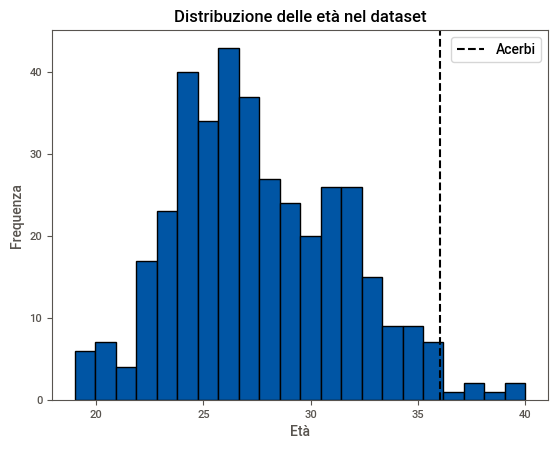

In [65]:
# Mostro la distribuzione dell'età dei giocatori disponibili
min_age = df_concatenato['Age'].min()
max_age = df_concatenato['Age'].max()
min_age = int(min_age)
max_age = int(max_age)
plt.hist(df_concatenato['Age'], bins=max_age-min_age+1, color=inter_color, edgecolor='black')
plt.axvline(x=36, color='black', linestyle='--', label='Acerbi')

plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle età nel dataset')

plt.legend()
plt.show()

Considerando che Acerbi ha già 36 anni e, come si vede dall'istogramma, è in un'età relativamente avanzata per essere un calciatore, cerco un sostituto che sia almeno più giovane di lui

In [66]:
df_finale = df_concatenato[df_concatenato['Age'] < 36]
df_finale.shape

(367, 65)

Filtro il dataset considerando solo i difensori che hanno giocato almeno 20 partite di campionato negli ultimi due anni (sia perché voglio un campione rappresentativo di dati, sia perché voglio giocatori relativamente esperti e non inclini a infortuni, e pronti a prendere subito il posto di titolare da Acerbi)

In [67]:
# considero solo i difensori che hanno giocato almeno 20 partite
df_finale = df_finale[df_finale['MP'] >= 20]
df_finale.shape

(260, 65)

Riaggiungo al dataset Acerbi, che avevo tolto in quanto giocatore di 36 anni

In [68]:
df_finale = df_finale.append(acerbi, ignore_index=True)
df_finale.shape

<ipython-input-68-941434f554b2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finale = df_finale.append(acerbi, ignore_index=True)


(261, 65)

# Estraggo il dataset finale

Stampo i valori di tutte le colonne per Acerbi, per decidere come muovermi

In [69]:
for col, value in acerbi.items():
    print(f"{col}: {value}")

Player: 94    Francesco Acerbi
Name: Player, dtype: object
Nation: 94    ITA
Name: Nation, dtype: object
Squad: 94    Inter
Name: Squad, dtype: object
Comp: 94    Serie A
Name: Comp, dtype: object
MP: 94    28.0
Name: MP, dtype: float64
Starts: 94    20.0
Name: Starts, dtype: float64
Min: 94    1880.0
Name: Min, dtype: float64
Goals: 94    0.0
Name: Goals, dtype: float64
Shots: 94    1.54
Name: Shots, dtype: float64
SoT: 94    0.35
Name: SoT, dtype: float64
ShoFK: 94    0.0
Name: ShoFK, dtype: float64
ShoPK: 94    0.0
Name: ShoPK, dtype: float64
PKatt: 94    0.0
Name: PKatt, dtype: float64
PasTotCmp: 94    91.7
Name: PasTotCmp, dtype: float64
PasTotAtt: 94    108.4
Name: PasTotAtt, dtype: float64
PasTotDist: 94    1651.9
Name: PasTotDist, dtype: float64
Assists: 94    0.08
Name: Assists, dtype: float64
PasProg: 94    9.98
Name: PasProg, dtype: float64
PasAtt: 94    108.4
Name: PasAtt, dtype: float64
PasLive: 94    103.8
Name: PasLive, dtype: float64
PasDead: 94    4.33
Name: PasDead, d

Ok, voglio dividere le statistiche che sono complessive della stagione e quelle valutate nei 90 minuti, che sono la maggior parte.
Essendo le statistiche valutate complessivamente nella stagione sempre dei count, come le partite giocate, o delle somme di quantità intere, come i minuti giocati, posso interpretarli come interi. Trasformo quindi tutte quelle features in int, lasciando le altre float.
L'unica eccezione è Goals, che viene indicata come complessiva ma posso dividere per 90 minuti. Lo faccio, conservandola come float.
Metto allora Age in object per non interferire poi con la cosa

In [70]:
int_columns =  ['Age','MP','Starts','Min']
df_finale[int_columns] = df_finale[int_columns].astype(int)

In [71]:
df_finale['Goals_per_90'] = df_finale['Goals'] / 90
df_finale = df_finale.drop('Goals', axis=1)
df_finale = df_finale.rename(columns={'Goals_per_90': 'Goals'})
df_finale['Goals'] = df_finale['Goals'].round(2)

In [72]:
column_types_count = df_finale.dtypes.value_counts()
column_types_count

float64    55
object      6
int64       4
dtype: int64

Ordino il dataset in ordine alfabetico sul cognome dei giocatori

In [73]:
def extract_last_word(string):
    return string.split()[-1]

df_finale['Last_Word'] = df_finale['Player'].apply(extract_last_word)

df_finale = df_finale.sort_values(by='Last_Word')

df_finale.drop(columns=['Last_Word'], inplace=True)

Riordino le colonne

In [74]:
df_finale.rename(columns={'Squad': 'Squad 22-23'}, inplace=True)

columns_ordered = df_finale.columns.tolist()

# Rimuovo le colonne da spostare dalla lista delle colonne
columns_ordered.remove('Actual Squad')
columns_ordered.remove('Goals')
columns_ordered.remove('Age')
columns_ordered.remove('Height')
columns_ordered.remove('Weight')
columns_ordered.remove('Foot')
# Le metto al posto che voglio
columns_ordered.insert(4, 'Actual Squad')
columns_ordered.insert(5, 'Age')
columns_ordered.insert(6, 'Height')
columns_ordered.insert(7, 'Weight')
columns_ordered.insert(8, 'Foot')
columns_ordered.insert(12, 'Goals')

# Riassegno le colonne al DataFrame
df_finale = df_finale[columns_ordered]

df_finale = df_finale.reset_index(drop=True)
df_finale

,Player,Nation,Squad 22-23,Comp,Actual Squad,Age,Height,Weight,Foot,MP,...,2CrdY,Fls,Fld,Off,Crs,TklW,Recov,AerWon,AerLost,Value (M)
0,Francesco Acerbi,ITA,Inter,Serie A,Inter,36,192.0,88.0,Left,28,...,0.00,2.47,2.01,0.08,1.29,1.97,13.10,3.69,2.68,9.5
1,Tosin Adarabioyo,ENG,Fulham,Premier League,Fulham,26,196.0,80.0,Right,29,...,0.00,1.59,1.26,0.00,0.31,2.43,11.18,2.44,0.80,10.0
2,Emmanuel Agbadou,CIV,Reims,Ligue 1,Stade de Reims,27,192.0,86.0,Right,20,...,0.00,1.01,0.28,0.00,0.00,11.63,18.20,1.85,11.35,7.0
3,Joseph Aidoo,GHA,Celta Vigo,La Liga,Celta de Vigo,28,181.0,80.0,Right,24,...,0.00,1.27,1.02,0.00,1.33,3.38,12.50,2.75,3.85,15.0
4,Manuel Akanji,SUI,Manchester City,Premier League,Manchester City,28,187.0,91.0,Right,31,...,0.00,2.56,2.14,0.09,7.82,2.79,12.90,2.03,2.32,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Christopher Wooh,CMR,Rennes,Ligue 1,Rennes,22,191.0,92.0,Right,27,...,0.00,2.16,2.31,0.15,3.36,0.98,7.71,3.44,1.86,4.4
257,Christopher Wooh,CMR,Rennes,Ligue 1,Rennes,22,191.0,92.0,Right,27,...,0.00,2.16,2.31,0.15,3.36,0.98,7.71,3.44,1.86,4.4
258,Dan Axel Zagadou,FRA,Stuttgart,Bundesliga,VfB Stuttgart,25,196.0,90.0,Left,22,...,0.00,2.35,2.17,0.50,0.17,0.84,6.92,4.04,4.69,12.0
259,Kurt Zouma,FRA,West Ham,Premier League,West Ham United,29,190.0,95.0,Right,30,...,0.00,0.66,3.95,0.17,1.67,1.47,8.77,3.61,2.18,16.5


Sistemo i duplicati

In [75]:
duplicati_df = df_finale[df_finale.duplicated(subset=['Player'], keep=False)]

print("Righe duplicate nella colonna 'Player':")
duplicati_df

Righe duplicate nella colonna 'Player':


,Player,Nation,Squad 22-23,Comp,Actual Squad,Age,Height,Weight,Foot,MP,...,2CrdY,Fls,Fld,Off,Crs,TklW,Recov,AerWon,AerLost,Value (M)
16,Loic Bade,FRA,Sevilla,La Liga,Sevilla,24,191.0,89.0,Right,23,...,0.11,4.98,2.69,0.80,8.45,4.04,16.77,4.17,6.18,19.5
17,Loic Bade,FRA,Sevilla,La Liga,Sevilla,24,191.0,89.0,Right,23,...,0.11,4.98,2.69,0.80,8.45,4.04,16.77,4.17,6.18,19.5
25,Sepp van den Berg,NED,Schalke 04,Bundesliga,FSV Mainz 05,22,192.0,87.0,Right,21,...,0.00,1.19,0.81,0.09,0.63,0.91,8.04,2.75,4.40,6.5
26,Sepp van den Berg,NED,Schalke 04,Bundesliga,FSV Mainz 05,22,192.0,87.0,Right,21,...,0.00,1.19,0.81,0.09,0.63,0.91,8.04,2.75,4.40,6.5
36,Dan Burn,ENG,Newcastle Utd,Premier League,Newcastle United,32,198.0,87.0,Left,34,...,0.00,1.32,1.34,0.39,2.31,1.13,9.42,2.87,2.00,9.5
37,Dan Burn,ENG,Newcastle Utd,Premier League,Newcastle United,32,198.0,87.0,Left,34,...,0.00,1.32,1.34,0.39,2.31,1.13,9.42,2.87,2.00,9.5
38,Anthony Caci,FRA,Mainz 05,Bundesliga,FSV Mainz 05,27,185.0,76.0,Right,32,...,0.00,2.41,0.45,0.11,4.76,2.69,12.97,2.75,3.77,4.8
39,Anthony Caci,FRA,Mainz 05,Bundesliga,FSV Mainz 05,27,185.0,76.0,Right,32,...,0.00,2.41,0.45,0.11,4.76,2.69,12.97,2.75,3.77,4.8
41,Luca Caldirola,ITA,Monza,Serie A,Monza,33,186.0,79.0,Left,23,...,0.00,5.23,3.03,2.00,2.21,0.48,7.84,1.78,1.16,2.7
42,Luca Caldirola,ITA,Monza,Serie A,Salernitana,22,185.0,79.0,Left,23,...,0.00,5.23,3.03,2.00,2.21,0.48,7.84,1.78,1.16,4.3


Ok, ci sono molti duplicati che riguardano i giocatori con cognomi da 4 lettere. procedo ad eliminarli. Gli Hernandez e i Caldirola invece li gestisco a mano

In [76]:
# Estraggo gli indici delle righe in cui Player = "Luca Caldirola" e Actual Squad = "Salernitana"
indici_caldirola_salernitana = df_finale.loc[(df_finale['Player'] == 'Luca Caldirola') & (df_finale['Actual Squad'] == 'Salernitana')].index

# Estraggo gli indici delle righe in cui Player = "Luis Hernandez" e Actual Squad = "Paris Saint Germain"
indici_hernandez_paris = df_finale.loc[(df_finale['Player'] == 'Luis Hernandez') & (df_finale['Actual Squad'] == 'Paris Saint Germain')].index

# Estraggo gli indici delle righe in cui Player = "Lucas Hernandez" e Actual Squad = "Cadiz"
indici_hernandez_cadiz = df_finale.loc[(df_finale['Player'] == 'Lucas Hernandez') & (df_finale['Actual Squad'] == 'Cadiz')].index

# Stampo gli indici
print("Indici per Luca Caldirola e Salernitana:", indici_caldirola_salernitana)
print("Indici per Luis Hernandez e Paris Saint Germain:", indici_hernandez_paris)
print("Indici per Lucas Hernandez e Cadiz:", indici_hernandez_cadiz)

Indici per Luca Caldirola e Salernitana: Int64Index([42], dtype='int64')
Indici per Luis Hernandez e Paris Saint Germain: Int64Index([106], dtype='int64')
Indici per Lucas Hernandez e Cadiz: Int64Index([107], dtype='int64')


In [77]:
da_eliminare = df_finale.iloc[[42, 106, 107]]
da_eliminare

,Player,Nation,Squad 22-23,Comp,Actual Squad,Age,Height,Weight,Foot,MP,...,2CrdY,Fls,Fld,Off,Crs,TklW,Recov,AerWon,AerLost,Value (M)
42,Luca Caldirola,ITA,Monza,Serie A,Salernitana,22,185.0,79.0,Left,23,...,0.00,5.23,3.03,2.00,2.21,0.48,7.84,1.78,1.16,4.3
106,Luis Hernandez,ESP,Cádiz,La Liga,Paris Saint Germain,28,184.0,79.0,Left,21,...,0.05,3.03,0.21,0.11,1.57,0.53,4.42,2.30,1.88,40.5
107,Lucas Hernandez,FRA,Bayern Munich,Bundesliga,Cadiz,35,183.0,75.0,Right,20,...,0.00,1.80,3.08,0.00,1.19,2.38,13.21,1.45,1.19,1.8


In [78]:
# Elimino le righe eliminate a mano da df_finale
df_finale = df_finale.drop(da_eliminare.index)

# Poi elimino anche i duplicati
df_finale = df_finale.drop_duplicates(subset=['Player'])

In [79]:
# Sistemo Skriniar, che ha probabilmente lo stesso problema di Marusic (ovvero che lo scraping non riconosce la sua S accentata)
df_finale['Player'] = df_finale['Player'].replace('Milan kriniar', 'Milan Skriniar')

In [80]:
# Ordino ancora in ordine alfabetico

def extract_last_word(string):
    return string.split()[-1]

df_finale['Last_Word'] = df_finale['Player'].apply(extract_last_word)

df_finale = df_finale.sort_values(by='Last_Word')

df_finale.drop(columns=['Last_Word'], inplace=True)

df_finale

,Player,Nation,Squad 22-23,Comp,Actual Squad,Age,Height,Weight,Foot,MP,...,2CrdY,Fls,Fld,Off,Crs,TklW,Recov,AerWon,AerLost,Value (M)
0,Francesco Acerbi,ITA,Inter,Serie A,Inter,36,192.0,88.0,Left,28,...,0.0,2.47,2.01,0.08,1.29,1.97,13.10,3.69,2.68,9.5
1,Tosin Adarabioyo,ENG,Fulham,Premier League,Fulham,26,196.0,80.0,Right,29,...,0.0,1.59,1.26,0.00,0.31,2.43,11.18,2.44,0.80,10.0
2,Emmanuel Agbadou,CIV,Reims,Ligue 1,Stade de Reims,27,192.0,86.0,Right,20,...,0.0,1.01,0.28,0.00,0.00,11.63,18.20,1.85,11.35,7.0
3,Joseph Aidoo,GHA,Celta Vigo,La Liga,Celta de Vigo,28,181.0,80.0,Right,24,...,0.0,1.27,1.02,0.00,1.33,3.38,12.50,2.75,3.85,15.0
4,Manuel Akanji,SUI,Manchester City,Premier League,Manchester City,28,187.0,91.0,Right,31,...,0.0,2.56,2.14,0.09,7.82,2.79,12.90,2.03,2.32,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Mateusz Wieteska,POL,Clermont Foot,Ligue 1,Cagliari,27,187.0,77.0,Right,43,...,0.0,0.57,1.29,0.32,5.23,0.86,8.42,2.90,2.43,2.0
255,Koni De Winter,BEL,Empoli,Serie A,Genoa,22,191.0,75.0,Right,33,...,0.0,3.10,2.20,0.00,4.01,1.99,9.61,1.93,1.63,3.2
256,Christopher Wooh,CMR,Rennes,Ligue 1,Rennes,22,191.0,92.0,Right,27,...,0.0,2.16,2.31,0.15,3.36,0.98,7.71,3.44,1.86,4.4
258,Dan Axel Zagadou,FRA,Stuttgart,Bundesliga,VfB Stuttgart,25,196.0,90.0,Left,22,...,0.0,2.35,2.17,0.50,0.17,0.84,6.92,4.04,4.69,12.0


In [81]:
from google.colab import files
df_finale.to_csv('df_finale.csv', index=False)
files.download('df_finale.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>